# TensorFlowでAutoEncorder

tensorflow 2.xを使う。

In [1]:
%tensorflow_version 2.x

ライブラリのインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

データの読み込み

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11501568/11490434 [==============================] - 0s 0us/step


モデルの定義

In [4]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(784, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 472,608
Trainable params: 472,608
Non-trainable params: 0
__________________________________________________

モデルのコンパイル

In [5]:
model.compile(optimizer='adam', loss='mse')

モデルの学習とその結果

In [6]:
def show_result():
    results = model.predict(test_images[:8])
  
    fig = plt.figure(figsize=(16, 2.7))
    for i in range(8):
      subplot = fig.add_subplot(2, 10, i+1)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.imshow(test_images[i].reshape((28, 28)),
                     vmin=0, vmax=1, cmap=plt.cm.gray_r)

      subplot = fig.add_subplot(2, 10, i+11)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.imshow(results[i].reshape((28, 28)),
                     vmin=0, vmax=1, cmap=plt.cm.gray_r)

118/118 [==============================] - 3s 19ms/step - loss: 0.0768


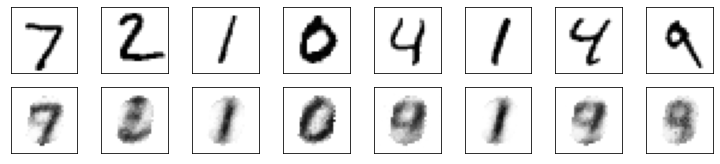

In [7]:
history = model.fit(train_images[:30000], train_images[:30000],
                    batch_size=256, epochs=1)
show_result()